# Game Automation Tool Description
## Basic Assumptions and Goals
- The project aims to create a safe and effective tool for automating gameplay, referred to as a bot or macro. By simulating player actions—such as mouse clicks and keyboard inputs—the bot behaves more like a real player, which reduces the likelihood of the game detecting suspicious activity. Unlike most bots that extract data directly from the website (which increases suspicious traffic), this project relies on what is visible on the screen. 
- The primary goal of the bot is to collect items by defeating specific opponents, then sell those items to a merchant, and repeat the cycle.


In [1]:
from func import *
from const import *
from visualization import *

## Time Between Player Actions
The `wait()` function is designed to mimic the average time a player typically takes to perform actions. It uses a normal distribution with appropriate parameters. The graph represents the time distribution for one million attempts. As shown, about 90% of the results fall between 0.1 and 0.8 seconds, realistically reflecting the time between player actions. In the program, these times are treated as vectors, meaning they can be scaled by multiplying or dividing by constants to optimize specific parts of the program.

def wait():
    x = np.random.normal(0.5,0.3,1)
    if x < 0 :  return float(-x + random.randrange(0,200)/1000)
    if x < 0.1 :return float(x + random.randrange(50,200)/1000) 
    if x > 1.2 : return float(x - random.randrange(0,500)/1000)
    return float(x)

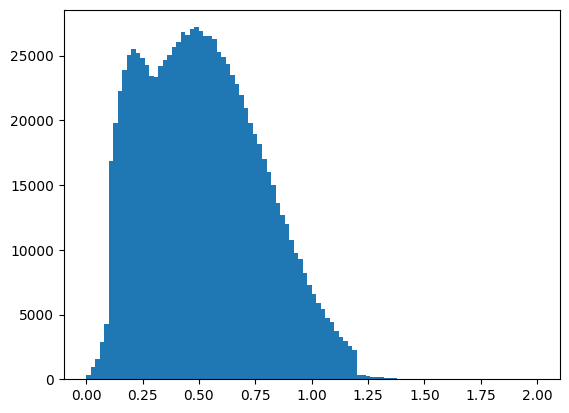

In [2]:
create_hist(1000000) #using function wait() for milion times and visualization

## Algorithm for Finding and Defeating Opponents
### This is the map we are working with. Let's start by explaining what each element represents.
- White square - player
- Red diamond - opponent
- Blue circle - transitions between maps<br>
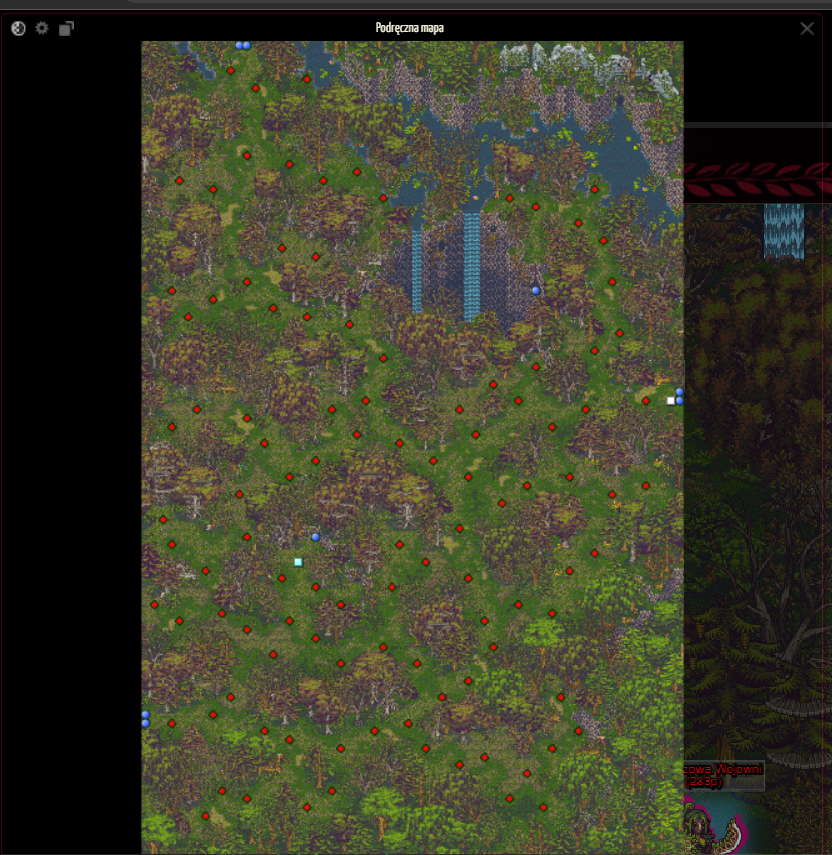<br>
The algorithm tracks the player's last position and calculates the shortest path to the nearest opponent(there are few exceptions to make the route more efficent). After locating the opponent, it simulates a mouse click on them and waits until the player character appears near the target. Once the player is in position, the algorithm presses the 'e' key to initiate an attack, pauses briefly, and then repeats the process. When all opponents on the map have been defeated, the bot moves to a predefined transition point leading to the next map, where the process starts again. Each time a new map is loaded, the bot updates its internal map name and relevant key values, ensuring the program continues to function correctly.


## Data Structures and Challenges Encountered
By using a dictionary where the keys represent unique map names, it became possible to conveniently store each map's properties. This is essential because every map differs in terms of opponent positions, dimensions, transitions, and other characteristics.


In [3]:
print(map_data["Gvar Hamryd"].printMapProperties())

startMiniMap:  [142, 118]
endMiniMap:  [685, 931]
mapSize:  [64, 96]
transitions:  [[63, 42], [63, 41], [11, 0], [12, 0], [0, 79], [0, 80]]
mob_locations:  [[25, 15], [52, 43], [53, 36], [54, 23], [46, 19], [44, 42], [39, 46], [42, 54], [45, 52], [55, 53], [53, 60], [48, 67], [40, 68], [38, 75], [32, 73], [31, 80], [37, 85], [45, 86], [22, 88], [12, 89], [17, 82], [8, 79], [15, 72], [16, 63], [12, 69], [48, 83], [35, 77], [33, 61], [34, 49], [26, 42], [20, 49], [3, 59], [4, 68], [9, 67], [14, 47], [44, 66], [17, 51], [6, 43], [19, 32], [8, 30], [16, 24], [8, 17], [17, 14], [13, 5], [30, 47], [59, 42], [55, 28], [53, 17], [50, 51], [38, 51], [37, 57], [38, 63], [29, 64], [23, 73], [49, 77], [23, 83], [3, 80], [7, 62], [12, 58], [11, 53], [25, 46], [28, 37], [24, 33], [12, 28], [12, 13], [19, 4], [56, 34]]
nextMapCoords:  [0, 79]
None


Additionally, the variable `game_state` stores information that is used as the basis for decision-making within the program.

In [4]:
game_state = const.GameState()
game_state.setGameState({"map_name": "Gvar Hamryd",})
print(game_state.getGameState())

{'map_name': 'Gvar Hamryd', 'player_coords': [62, 42], 'mob_coords': [0, 0], 'start_mini_map': [142, 118], 'end_mini_map': [685, 931], 'map_size': [64, 96], 'step_x': 8.484375, 'step_y': 8.46875}


One of the main challenges was converting pixel positions on the screen into in-game coordinates. This is where the variables `step_x` and `step_y` come into play, as they represent one coordinate step on the map along the respective axis. The function `transfer_coords_to_pixels_XY(coords, game_state)` is used to convert game coordinates into pixel positions on the screen.

In [5]:
def transfer_coords_to_pixels_XY(coords,game_state):#coords = [x,y]
    return game_state.start_mini_map.getStartMiniMap()[0] + (coords[0]+0.5) * game_state.map_size.getStepX(), game_state.start_mini_map.getStartMiniMap()[1] + (coords[1]+0.5) * game_state.map_size.getStepY()

print(transfer_coords_to_pixels_XY([20,20],game_state))

(315.9296875, 291.609375)


This means that the coordinates `[20, 20]` on the "Gvar Hamryd" map correspond to the pixel position `(315.9296875, 291.609375)`. These results will vary depending on the monitor resolution and the zoom level on the webpage (e.g., using Alt + scroll). Unfortunately, this part of the program is not universal and would need to be adjusted for each user. For the program to function correctly, the dimensions of the mini-map are required, which are stored in the variables `start_mini_map` and `end_mini_map`.

## Future Development Prospects
The main attribute of the project is the universality of the code and consolidating all necessary information in one place. By using classes and storing all data in a single variable, the most time-consuming task when adding new maps would be manually mapping the opponents, rather than writing additional code. <br>
Another potential feature could be the automatic detection of heroes that appear at fixed locations across multiple maps. This would require mapping individual respawn points and "measuring" a large number of maps.
